In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!python generate-clusters.py test_clusters 50 1.0 0 0.5 0.5 2.0 2.0 1.0 1.0

In [3]:
df = pd.read_csv('test_clusters', sep='\t', header=None)
data = df.values

In [4]:
labels = data[:,2]
classes = np.unique(labels)

In [5]:
clusters = [data[np.where(labels==c)][:,:2] for c in classes]

In [6]:
def scatter(a):
    x,y = list(zip(*a))
    plt.scatter(x,y)

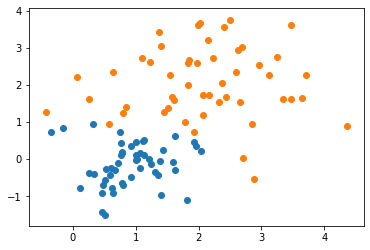

In [7]:
x,y = list(zip(*clusters[0]))
plt.scatter(x,y)

x,y = list(zip(*clusters[1]))
plt.scatter(x,y)


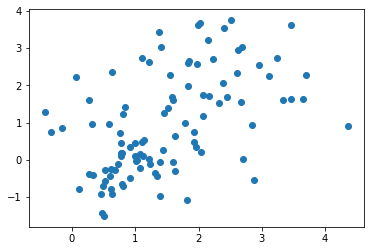

In [8]:
scatter(data[:,:2])

In [ ]:
'''
let K
centroids = randomly sample K pts from data space

for _ in range(its):
for each centroid:
    get dist between centroid and all datapts
    assign each dp to closest centroid
    for resulting clusters, calculate mean
    that mean in the new center

'''

In [81]:
def dist(a,b):
    return np.linalg.norm(a-b) # gives you the euclidian distance btw 2 points

In [128]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def sq_loss(x, c):
    return np.sum(np.power((l-c),2))

def loss(x, y, classes):
    return np.mean([sq_loss(x[np.where(y==c)],c) for c in classes])

def nearest_centers(x, centers, dist=dist):
    return np.argmin(np.array([[dist(c,p) for p in x] for c in centers]), axis=0)

100


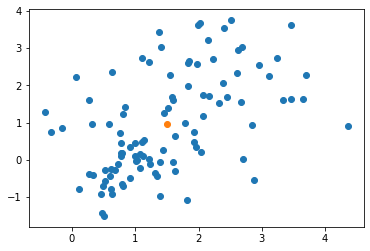

41
59


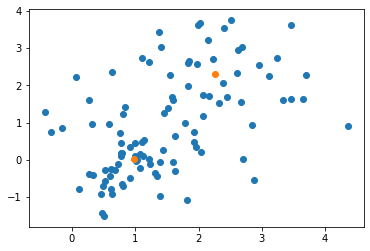

26
57
17


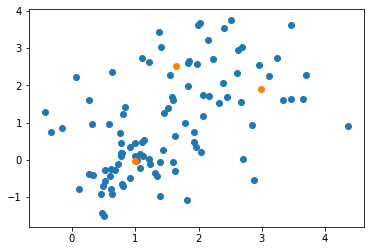

22
27
15
36


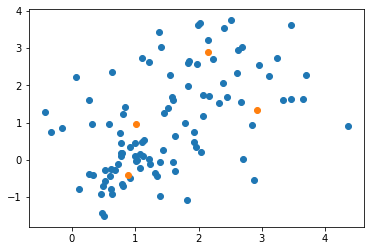

28
13
19
24
16


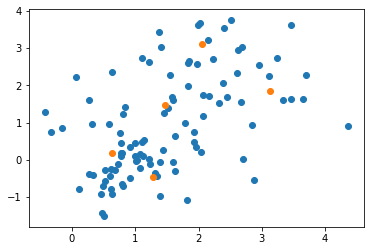

17
11
20
15
8
29


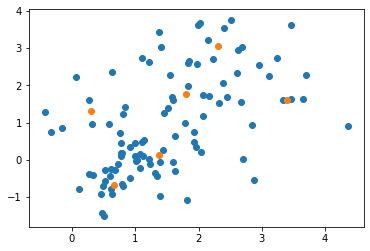

19
10
10
17
8
14
22


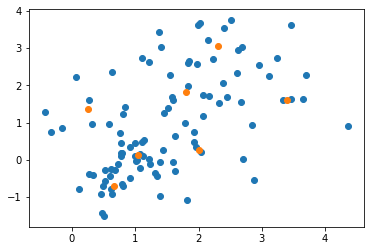

17
6
15
12
26
10
6
8


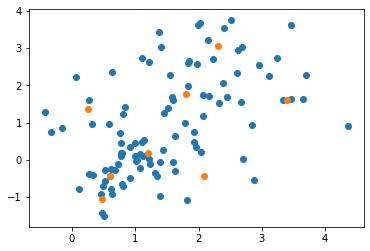

19
8
2
11
17
10
1
21
11


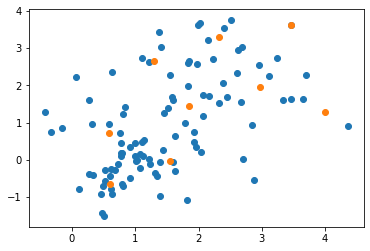

In [129]:
x = data[:,:2]
#Y = data[:,2]

K = 10

for k in range(1,K):
    its = 50

    centers = initialize_centroids(x, k)
    classes = list(range(k))
    y = np.zeros(Y.shape)

    for it in range(its):
        y = nearest_centers(x, centers)

        #Grab all x pts closest to each centroid, and take the mean of each group.
        centers = np.array([np.mean(x[np.where(y==c)], axis=0) for c in classes])

    scatter(x)
    scatter(centers)
    for c in classes:
        #scatter(x[np.where(y==c)])
        print(len(x[np.where(y==c)]))
    plt.show()

In [127]:
dist(np.array([0,0]), np.array([1,1]))

2.0000000000000004

0.03189840446333334

In [47]:
lbls = []
for p in x:
    least_dist = np.inf
    closest = None
    for c in cs:
        d = dist(p,c)
        if d < least_dist:
            least_dist = d
            closest = c
    lbls.append(closest)
    
np.unique(lbls, axis=0)

array([[ 0.471939, -1.419085],
       [ 0.771411,  0.450041],
       [ 1.308024, -0.338101],
       [ 1.396719, -0.969163],
       [ 1.778885,  1.000591]])

In [56]:
np.argmin(np.array([[dist(c,p) for p in x] for c in cs]), axis=0)

array([2, 2, 3, 2, 2, 2, 3, 3, 4, 2, 3, 3, 3, 4, 3, 0, 2, 3, 3, 0, 0, 2,
       2, 2, 3, 2, 2, 1, 0, 3, 2, 2, 2, 0, 2, 3, 2, 4, 1, 3, 2, 3, 3, 2,
       0, 3, 0, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4])